## Titanic: Machine Learning from Disaster

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")

In [3]:
print('train_df : ', train_df.shape)
print('test_df  : ', test_df.shape)

train_df :  (891, 12)
test_df  :  (418, 11)


In [4]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
train_df["Age"] = train_df["Age"].fillna(train_df["Age"].median())
train_df["Embarked"] = train_df["Embarked"].fillna("S")

train_df["Sex"][train_df["Sex"] == "male"] = 0
train_df["Sex"][train_df["Sex"] == "female"] = 1
train_df["Embarked"][train_df["Embarked"] == "S"] = 0
train_df["Embarked"][train_df["Embarked"] == "C"] = 1
train_df["Embarked"][train_df["Embarked"] == "Q"] = 2

train_df.isnull().sum()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_laun

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [7]:
test_df["Age"] = test_df["Age"].fillna(test_df["Age"].median())
test_df.Fare[152] = test_df.Fare.median()

test_df["Sex"][test_df["Sex"] == "male"] = 0
test_df["Sex"][test_df["Sex"] == "female"] = 1
test_df["Embarked"][test_df["Embarked"] == "S"] = 0
test_df["Embarked"][test_df["Embarked"] == "C"] = 1
test_df["Embarked"][test_df["Embarked"] == "Q"] = 2

test_df.isnull().sum()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_laun

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [8]:
from sklearn import tree

In [9]:
# 「train_df」の目的変数と説明変数の値を取得
y = train_df["Survived"].values
x = train_df[["Pclass", "Sex", "Age", "Fare"]].values

# 決定木の作成
model = tree.DecisionTreeClassifier()
model.fit(x, y)

# [test_df]の説明変数を使ってモデルで予測
x_test = test_df[["Pclass", "Sex", "Age", "Fare"]].values

# [test_df]の説明変数を使ってモデルで予測
prediction = model.predict(x_test)

In [10]:
# PassengerIdを取得
PassengerId = np.array(test_df["PassengerId"]).astype(int)

# predictionとPassengerIdから提出データを作成する
submit_data = pd.DataFrame(prediction, PassengerId, columns=["Survived"])

submit_data.head()

,Survived
892,0
893,0
894,1
895,1
896,1


In [11]:
# submit1.csvとしてファイル出力
submit_data.to_csv("submit1.csv", index_label=["PassengerId"])

### 1, 使用変数を増やす

In [12]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


In [13]:
# 使用可能な説明変数を全て使用する
y = train_df["Survived"].values
x = train_df[["Pclass", "Sex", "Age", "Fare", "SibSp", "Parch", "Embarked"]].values

# 決定木の作成(引数をいくつか指定してみる)
model = tree.DecisionTreeClassifier(max_depth=10, min_samples_split=5)
model.fit(x, y)

# [test_df]の説明変数を使ってモデルで予測
x_test = test_df[["Pclass", "Sex", "Age", "Fare", "SibSp", "Parch", "Embarked"]].values

# [test_df]の説明変数を使ってモデルで予測
prediction = model.predict(x_test)

In [14]:
# PassengerIdを取得
PassengerId = np.array(test_df["PassengerId"]).astype(int)

# predictionとPassengerIdから提出データを作成する
submit_data = pd.DataFrame(prediction, PassengerId, columns=["Survived"])

submit_data.head()

,Survived
892,0
893,0
894,0
895,0
896,1


In [15]:
# submit2.csvとしてファイル出力
submit_data.to_csv("submit2.csv", index_label=["PassengerId"])

### 2, 各変数の特徴をプロット図から探る

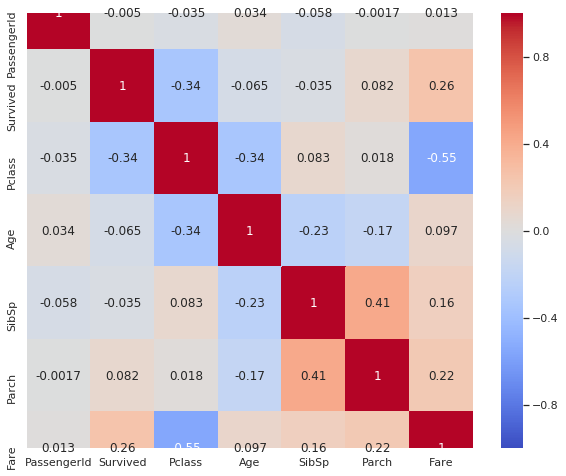

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# 各パラメータの相関マトリックスを作成
corr_matrix = train_df.corr()
fig, ax = plt.subplots(figsize = (10,8))
sns.heatmap(corr_matrix, annot = True, fmt='.2g', vmin = -1,
            vmax = 1, center = 0, cmap = 'coolwarm')

In [17]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

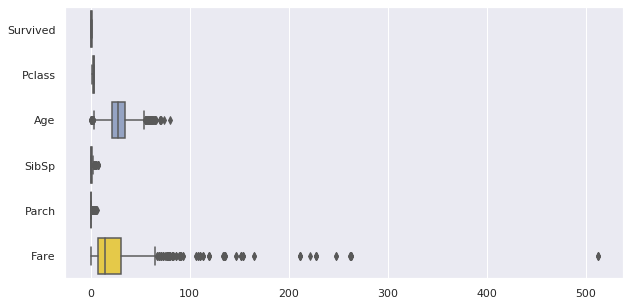

In [18]:
#boxplot
numeric_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
fig, ax = plt.subplots(figsize = (10,5))
sns.boxplot(data = train_df[numeric_cols], orient = 'h', palette = 'Set2')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c61114210>,
      dtype=object)

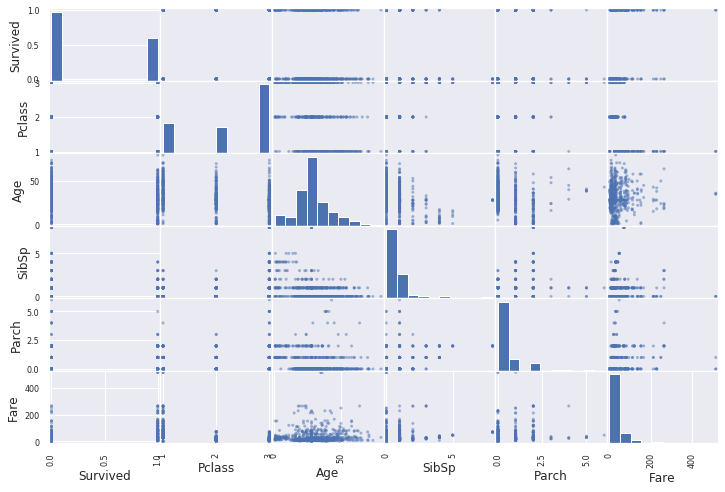

In [19]:
from pandas.plotting import scatter_matrix
scatter_matrix(train_df[numeric_cols], figsize= (12,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c603f76d0>,
      dtype=object)

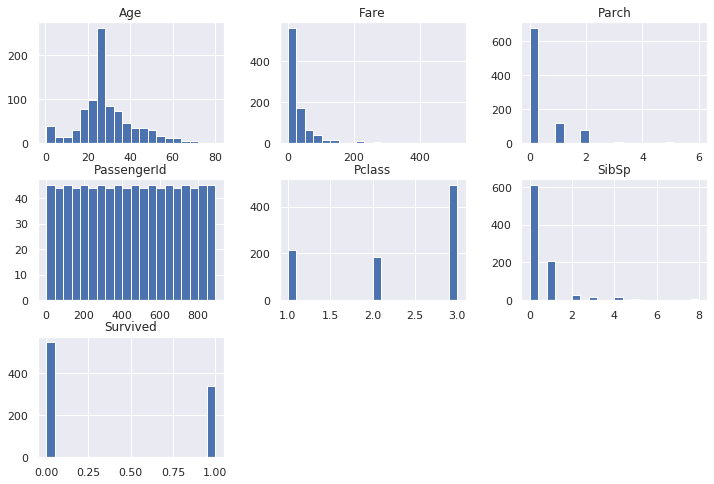

In [20]:
train_df.hist(bins = 20, figsize = (12,8))

Text(0.5, 1.0, 'Count Survived for each Class')

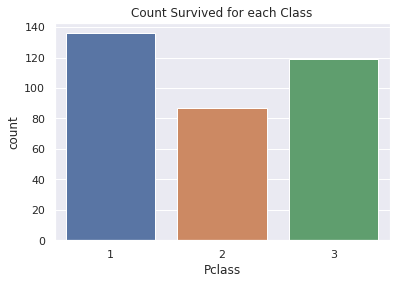

In [21]:
sns.countplot(train_df[train_df['Survived'] == 1]['Pclass']).set_title('Count Survived for each Class')

In [22]:
len(train_df[train_df['Pclass'] == 1]), len(train_df[train_df['Pclass'] == 2]), len(train_df[train_df['Pclass'] == 3])

(216, 184, 491)

In [23]:
train_df[train_df['Pclass'] == 1]['Survived'].sum(), train_df[train_df['Pclass'] == 2]['Survived'].sum(), train_df[train_df['Pclass'] == 3]['Survived'].sum()   

(136, 87, 119)

In [24]:
percentages = []
first = 136 / 216
second = 87/ 184
third = 119/491
percentages.append(first)
percentages.append(second)
percentages.append(third)

In [25]:
percents = pd.DataFrame(percentages)
percents.index+=1

Text(0.5, 1.0, 'Percent Survived for Passenger Class')

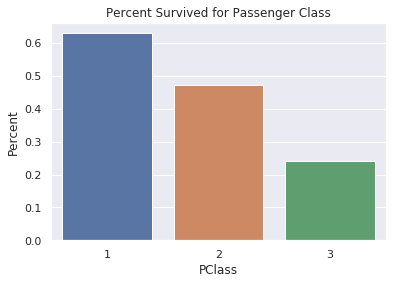

In [26]:
percents['PClass'] = ['1', '2', '3']
cols= ['Percent', 'PClass']
percents.columns = [i for i in cols]
sns.barplot(y = 'Percent', x = 'PClass', data = percents).set_title('Percent Survived for Passenger Class')

### 3. ランダムフォレストで分析を実施